In [1]:
import numpy as np
import pandas as pd
%matplotlib widget
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg as la
from scipy import stats

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


(3, 3000)


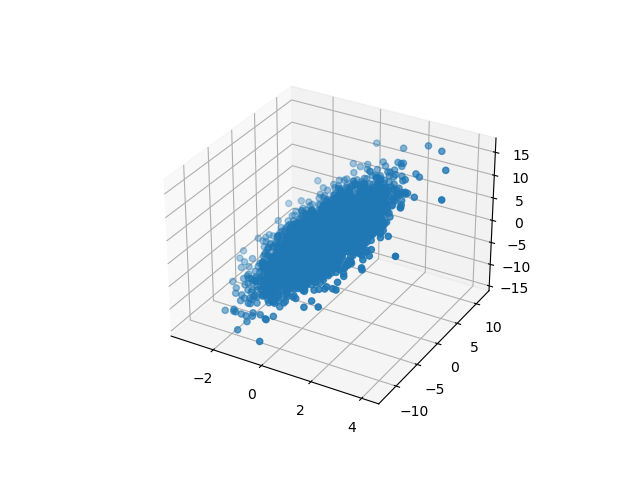

In [2]:
x1 = np.random.normal(0,1,(3000,))
x2 = x1 + np.random.normal(0,3,(3000,))
x3 = 2 * x1 + x2
dataset = np.vstack((x1, x2, x3))
print(dataset.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, x3)
plt.show()


In [3]:
cov_mtx = np.cov(dataset)
print("The covariance matrix is:\n", cov_mtx)
lambdas, vr = la.eig(cov_mtx, right=True)
print("Its eigenvalues are:\n", lambdas)
print("Its eigenvectors are:")
for i in np.arange(vr.shape[0]):
    print(vr[i,:])

The covariance matrix is:
 [[ 0.99637398  1.0057409   2.99848886]
 [ 1.0057409  10.07227306 12.08375485]
 [ 2.99848886 12.08375485 18.08073258]]
Its eigenvalues are:
 [2.71554754e+01+0.j 1.53621785e-16+0.j 1.99390419e+00+0.j]
Its eigenvectors are:
[-0.11482317 -0.81649658  0.56581708]
[-0.5781584  -0.40824829 -0.70644618]
[-0.80780475  0.40824829  0.42518799]


In [4]:
U, spectrum, Vt = la.svd(cov_mtx)
print(U)
print(spectrum)
print(Vt)

[[-0.11482317  0.56581708 -0.81649658]
 [-0.5781584  -0.70644618 -0.40824829]
 [-0.80780475  0.42518799  0.40824829]]
[2.71554754e+01 1.99390419e+00 8.18877416e-16]
[[-0.11482317 -0.5781584  -0.80780475]
 [ 0.56581708 -0.70644618  0.42518799]
 [-0.81649658 -0.40824829  0.40824829]]


In [20]:
def eigen_checker(diag_values, svd_values, tol):
    diag_values = np.sort(diag_values)
    svd_values = np.sort(svd_values)
    equals = np.zeros((len(diag_values),))
    if (len(diag_values) != len(svd_values)):
        print("Number of eigenvalues and singular values do not match")
    else:
        for i in np.arange(len(diag_values)):
            if (diag_values[i] - svd_values[i] <= tol):
                equals[i] = True
            else:
                equals[i] = False
    return equals

tol = 1e-20
equals = eigen_checker(lambdas, spectrum, tol)
print(equals)

[0. 1. 1.]


In [6]:
sort_perm = lambdas.argsort()[::-1] 
lambdas = lambdas[sort_perm]
for i in np.arange(vr.shape[0]):
    temp = vr[i,:]
    temp = temp[sort_perm]
    vr[i,:] = temp


print("The ordered eigenvalues and their corresponding eigenvectors are:\n", lambdas, "\n", vr)


eigen_sum = np.sum(lambdas)
var_ratios = [x / eigen_sum for x in lambdas]
print("The variablilty ratios associated with every eigenvalue are:\n", var_ratios)
print("And they are associated with the eigenvector:\n", vr)

The ordered eigenvalues and their corresponding eigenvectors are:
 [2.71554754e+01+0.j 1.99390419e+00+0.j 1.53621785e-16+0.j] 
 [[-0.11482317  0.56581708 -0.81649658]
 [-0.5781584  -0.70644618 -0.40824829]
 [-0.80780475  0.42518799  0.40824829]]
The variablilty ratios associated with every eigenvalue are:
 [(0.9315970281177656+0j), (0.0684029718822345+0j), (5.270156240482633e-18+0j)]
And they are associated with the eigenvector:
 [[-0.11482317  0.56581708 -0.81649658]
 [-0.5781584  -0.70644618 -0.40824829]
 [-0.80780475  0.42518799  0.40824829]]


In [7]:
feature_vector = vr[:,0:2]
print("The principal components we decide to keep are:\n", feature_vector)

The principal components we decide to keep are:
 [[-0.11482317  0.56581708]
 [-0.5781584  -0.70644618]
 [-0.80780475  0.42518799]]


Il dataset nella nuova base è:
 [[ 1.13094399 -0.24564306]
 [ 5.63338378 -1.63511605]
 [-2.73847618  0.4472398 ]
 [ 5.41234713  0.77420328]
 [ 6.4807427  -0.83910698]
 [-0.11923651 -0.69943659]
 [-6.54547506 -0.80833709]
 [ 9.03118474  0.14003947]
 [ 5.05008042  0.10596557]
 [-0.37126895  1.45174595]]


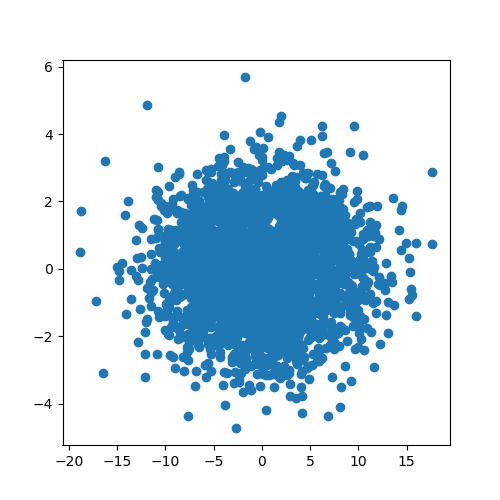

In [8]:
reducted_dataset = np.dot(feature_vector.T,dataset)
print("Il dataset nella nuova base è:\n", reducted_dataset.T[0:10])
plt.figure(figsize=(5,5))
plt.scatter(reducted_dataset[0,:], reducted_dataset[1,:])
plt.show()

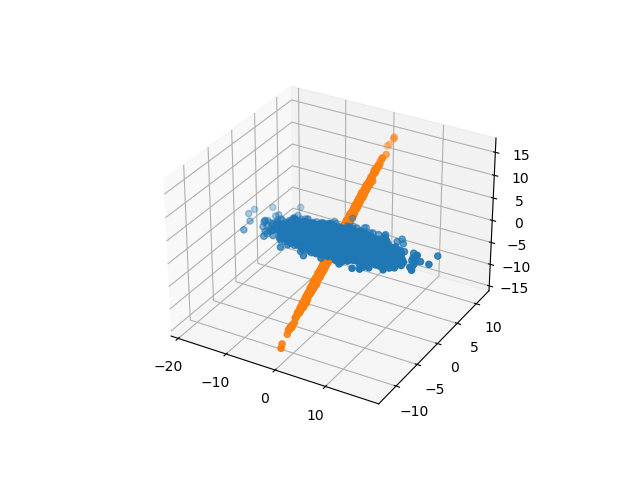

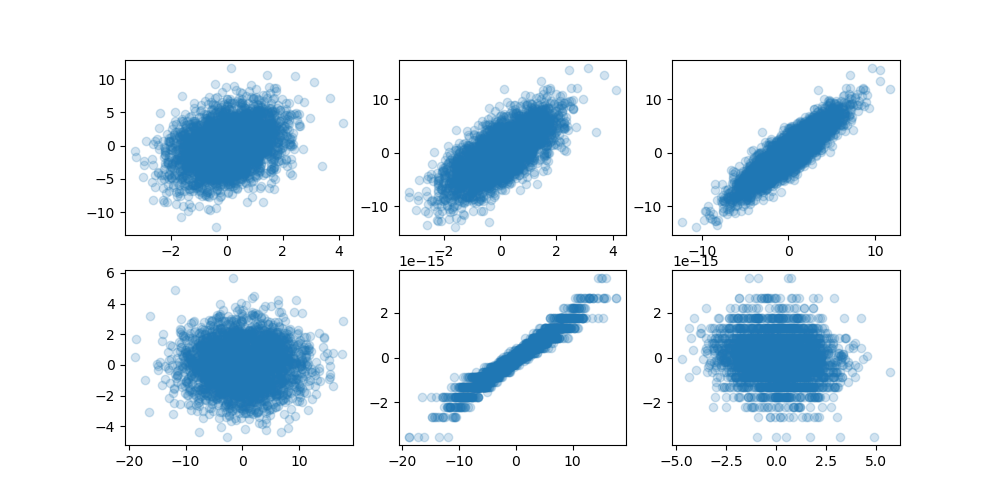

In [9]:
new_basis_dataset = np.dot(vr.T,dataset)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(new_basis_dataset[0,:], new_basis_dataset[1,:], new_basis_dataset[2,:])
ax.scatter(x1, x2, x3)
fig, ax = plt.subplots(2,3, figsize=(10,5))
ax[0,0].scatter(dataset[0,:], dataset[1,:], alpha=0.2)
ax[0,1].scatter(dataset[0,:], dataset[2,:], alpha=0.2)
ax[0,2].scatter(dataset[1,:], dataset[2,:], alpha=0.2)
ax[1,0].scatter(new_basis_dataset[0,:], new_basis_dataset[1,:], alpha=0.2)
ax[1,1].scatter(new_basis_dataset[0,:], new_basis_dataset[2,:], alpha=0.2)
ax[1,2].scatter(new_basis_dataset[1,:], new_basis_dataset[2,:], alpha=0.2)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [10]:
# define the oscillating motion along x axis with w = 2, alpha = 0 and A = 0.05
def motion(x,amp,w,ph):
    return amp * np.sin(w * x + ph)

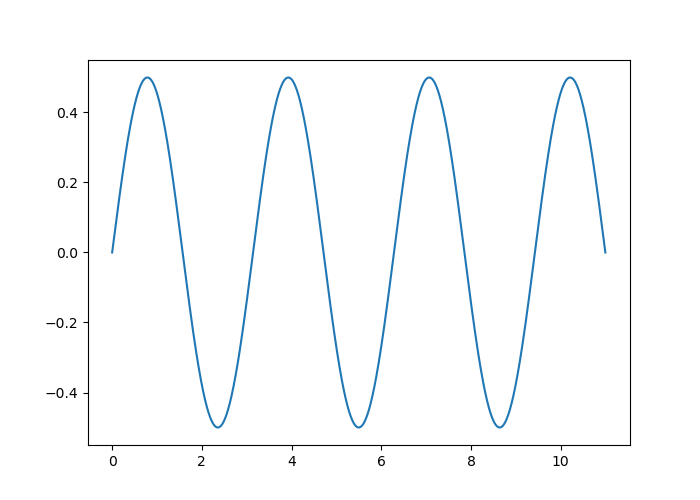

In [11]:
# consider an oscillating motion along x axis with w = 2, alpha = 0 and A = 0.05
n_samp = 1000
omega = 2
alpha = 0
A = 0.5
times = np.linspace(0,3.5*np.pi,n_samp)
osc = motion(times,A,omega,alpha)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(times, osc)

In [12]:
# we now embed it into 3d space
motion3d = np.empty(shape=(len(times),3))
motion3d[:,0] = osc
motion3d[:,1] = np.random.normal(0,0.001,len(times))
motion3d[:,2] = np.zeros(shape=(len(times),))

In [13]:
# now we create random directions of the cameras (20 cameras)
n = 20
theta = stats.uniform.rvs(0,np.pi,n) #angle wrt z axis
phi = stats.uniform.rvs(0,2*np.pi,n) #angle wrt x axis
angs = np.vstack([theta,phi]).T

# define functions to create rotation matrices
def rot_y(ang):
    return np.array([[np.cos(ang), 0, np.sin(ang)], [0, 1, 0], [-np.sin(ang), 0, np.cos(ang)]])

def rot_z(ang):
    return np.array([[np.cos(ang), -np.sin(ang), 0], [np.sin(ang), np.cos(ang), 0], [0, 0, 1]])

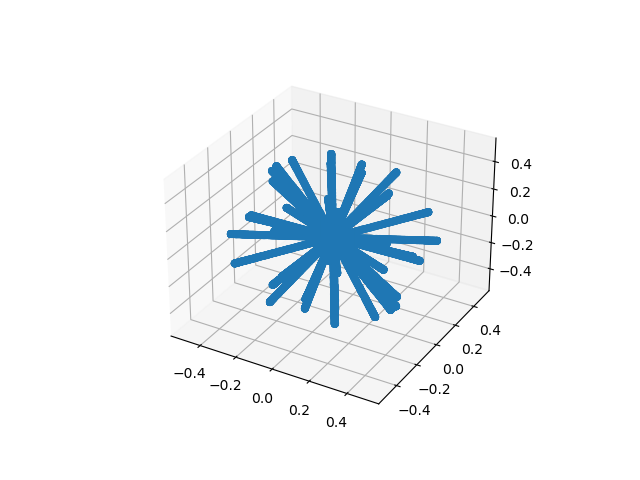

In [14]:
# create rotated vectors
cameras_dataset = np.empty(shape=(3,n_samp*n),dtype='float')
for i,a in enumerate(angs):
    rotation = np.dot(rot_z(a[1]),rot_y(a[0]))
    temp_dataset = np.dot(rotation,motion3d.T)
    cameras_dataset[:,i*n_samp:(i+1)*n_samp] = temp_dataset

# visualize dataset
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cameras_dataset[0,:], cameras_dataset[1,:], cameras_dataset[2,:])
plt.show()

In [15]:
cov_mtx = np.cov(cameras_dataset)
print("The covariance matrix is:\n", cov_mtx)
lambdas, vr = la.eig(cov_mtx, right=True)
print("Its eigenvalues are:\n", lambdas)
print("Its eigenvectors are:")
for i in np.arange(vr.shape[0]):
    print(vr[i,:])

The covariance matrix is:
 [[ 0.04434928 -0.0044234  -0.00197664]
 [-0.0044234   0.03075471  0.00178727]
 [-0.00197664  0.00178727  0.04915145]]
Its eigenvalues are:
 [0.02937393+0.j 0.04445467+0.j 0.05042684+0.j]
Its eigenvectors are:
[ 0.275593    0.86597061 -0.41730493]
[ 0.9594522  -0.22108199  0.17485489]
[-0.05916059  0.44857292  0.89178605]


In [16]:
sort_perm = lambdas.argsort()[::-1] 
lambdas = lambdas[sort_perm]
for i in np.arange(vr.shape[0]):
    temp = vr[i,:]
    temp = temp[sort_perm]
    vr[i,:] = temp

print("The ordered eigenvalues and their corresponding eigenvectors are:\n", lambdas, "\n", vr)

eigen_sum = np.sum(lambdas)
var_ratios = [x / eigen_sum for x in lambdas]
print("The variablilty ratios associated with every eigenvalue are:\n", var_ratios)
print("And they are associated with the eigenvector:\n", vr)

The ordered eigenvalues and their corresponding eigenvectors are:
 [0.05042684+0.j 0.04445467+0.j 0.02937393+0.j] 
 [[-0.41730493  0.86597061  0.275593  ]
 [ 0.17485489 -0.22108199  0.9594522 ]
 [ 0.89178605  0.44857292 -0.05916059]]
The variablilty ratios associated with every eigenvalue are:
 [(0.4058320164896581+0j), (0.35776841943619175+0j), (0.23639956407415016+0j)]
And they are associated with the eigenvector:
 [[-0.41730493  0.86597061  0.275593  ]
 [ 0.17485489 -0.22108199  0.9594522 ]
 [ 0.89178605  0.44857292 -0.05916059]]


In [17]:
feature_vector = vr[:,0:2]
print("The principal components we decide to keep are:\n", feature_vector)

The principal components we decide to keep are:
 [[-0.41730493  0.86597061]
 [ 0.17485489 -0.22108199]
 [ 0.89178605  0.44857292]]


Il dataset nella nuova base è:
 [[-0.87965856 -0.58328064]
 [-4.38973579 -3.2498092 ]
 [ 2.12712945  1.28886661]
 [-4.17168826 -1.15965065]
 [-5.02967595 -2.86663063]
 [ 0.07857536 -0.5455307 ]
 [ 5.04757139  1.50951784]
 [-6.98348703 -2.89896877]
 [-3.90450346 -1.59790589]
 [ 0.31555804  1.33894716]]


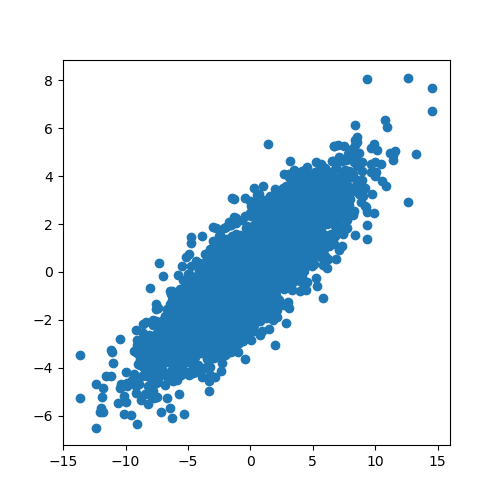

In [18]:
reducted_dataset = np.dot(feature_vector.T,dataset)
print("Il dataset nella nuova base è:\n", reducted_dataset.T[0:10])
plt.figure(figsize=(5,5))
#ax = fig.add_subplot(projection='3d')
plt.scatter(reducted_dataset[0,:], reducted_dataset[1,:])
plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [19]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.
